In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

import scipy.special #for legendre polynomials

In [12]:
a, b = 1, 3
Nr = round((b-a)/0.01)
Nth = 100
r = np.linspace(a,b,Nr)
th = np.linspace(0,np.pi,Nth)

R,TH = np.meshgrid(r,th)

In [20]:
lmax = 10

l = np.arange(0,lmax+1)

In [24]:
Al = np.where(l==1,-1,0) ## A1 = -E0 (E0=1)
Bl = -a**(2*l+1)*Al

In [25]:
V = np.sum((Al * R[...,np.newaxis]**l + Bl * R[...,np.newaxis]**(-l-1)) ## Al r^l + Bl/r^(l+1) times
               * scipy.special.lpmv(0,l,np.cos(TH)[...,np.newaxis]) ## Pl(cos(theta))
           ,axis=-1) ## sum over l

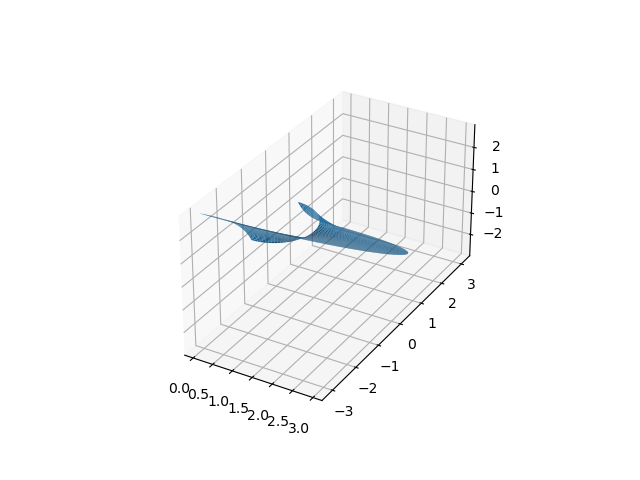

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X = R*np.sin(TH)
Z = R*np.cos(TH)
ax.set_box_aspect((1,2,1))
ax.plot_surface(X,Z,V)